In [2]:
# Library load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(os.listdir("C://Users/isang/OneDrive/Desktop/WM/data"))

['LSWMD.pkl']


In [4]:
df = pd.read_pickle("C://Users/isang/OneDrive/Desktop/WM/data/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [5]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [6]:
f_squeeze = lambda x:str(np.squeeze(x))
df['failureType'] = df['failureType'].map(f_squeeze)
df['trianTestLabel'] = df['trianTestLabel'].map(f_squeeze)
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


In [7]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [8]:
# Number of Wafer Map in Dataset
print(f"Wafer Map 개수 : {len(df)}") 

# Number of lots
# lot : Set of twenty-five wafers
print(f"lot 개수 : {len(df['lotName'].value_counts())}")

# Number of Wafers
print(f"lot 개수 x Wafer 묶음 : {25*len(df['lotName'].value_counts())}")

Wafer Map 개수 : 811457
lot 개수 : 46293
lot 개수 x Wafer 묶음 : 1157325


In [9]:
df['lotName'].value_counts()

lotName
lot1        25
lot26113    25
lot26129    25
lot26125    25
lot26124    25
            ..
lot9377      1
lot33363     1
lot33362     1
lot33337     1
lot31847     1
Name: count, Length: 46293, dtype: int64

In [10]:
df_counts = df['lotName'].value_counts().reset_index()

df_counts.columns = ['lotName', 'cnt']

len(df_counts[df_counts['cnt'] == 25])

21762

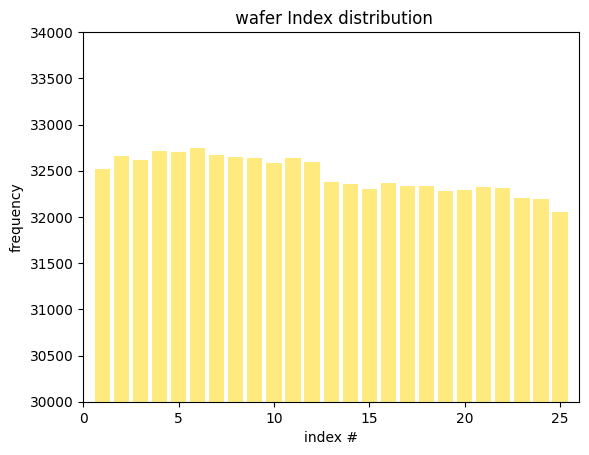

In [11]:
uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [12]:
df = df.drop(['waferIndex'], axis=1)

In [13]:
def find_dim(x):                # 'waferMap' 값을 받아 
    dim0=np.size(x, axis=0)
    dim1=np.size(x, axis=1)
    return dim0, dim1

df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
703972,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot43183,Training,none,"(25, 27)"
514451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,...",515.0,lot32139,[],[],"(25, 27)"
176724,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2393.0,lot11298,[],[],"(52, 59)"
387869,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3878.0,lot23230,[],[],"(88, 56)"
194360,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot12328,[],[],"(64, 71)"


In [14]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [15]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

## Missing Value & Failure Type Check Part

In [16]:
# Extract unique value in sublist   
unique_trainTestNum_types = df['trianTestLabel'].unique()
unique_failure_types = df['failureType'].unique()

print(unique_trainTestNum_types)
print(unique_failure_types)

['Training' '[]' 'Test']
['none' 'Loc' '[]' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random'
 'Near-full' 'Donut']


In [17]:
# Add new columns for Mapping about 'failureType' & 'trainTestLabel'
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel

mapping_type={'Center':0, 
              'Donut':1, 
              'Edge-Loc':2, 
              'Edge-Ring':3, 
              'Loc':4, 
              'Random':5,
              'Scratch':6, 
              'Near-full':7, 
              'none':8,
              '[]': 9}

mapping_traintest={'Training':0, 'Test':1, '[]': 2}

# Mapping with numbers
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

df.sample(10)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
294257,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1244.0,lot18012,[],[],"(38, 43)",9,2
33246,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",741.0,lot3191,[],[],"(33, 29)",9,2
529500,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,...",515.0,lot33145,[],[],"(25, 27)",9,2
580064,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",846.0,lot36226,[],[],"(33, 33)",9,2
636461,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",846.0,lot40068,[],[],"(33, 33)",9,2
705154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot43231,Training,none,"(25, 27)",8,0
514688,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1,...",515.0,lot32156,[],[],"(25, 27)",9,2
126024,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3895.0,lot8324,[],[],"(73, 67)",9,2
169230,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2393.0,lot10826,[],[],"(52, 59)",9,2
700737,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",516.0,lot43053,Training,none,"(25, 27)",8,0


In [18]:
tol_wafers = df.shape[0]

tol_wafers

811457

In [19]:
# New dataframe with labels
df_withlabel = df[(df['failureNum'] >= 0) & (df['failureNum'] <= 8 )]
df_withlabel = df_withlabel.reset_index()

# New dataframe with patterns (Except for failureType = none)
df_withpattern = df[(df['failureNum'] >= 0) & (df['failureNum'] <= 7)]
df_withpattern = df_withpattern.reset_index()

# New dataframe without patterns (failureType = none)
df_nonpattern = df[(df['failureNum'] == 8)]

df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]


(172950, 25519, 147431)

In [20]:
df_withpattern.shape[0] + df_nonpattern.shape[0]

172950

In [21]:
df_other = df[~((df['failureNum'] >= 0) & (df['failureNum'] <= 8))]

if 172950 + len(df_other)== df.shape[0]:
    print(True)
# N of Data with label +  N of Data w/o label = N of Total data

True


In [22]:
df_other.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",9,2
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",9,2
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,[],[],"(53, 58)",9,2
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,[],[],"(53, 58)",9,2
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,[],[],"(26, 26)",9,2


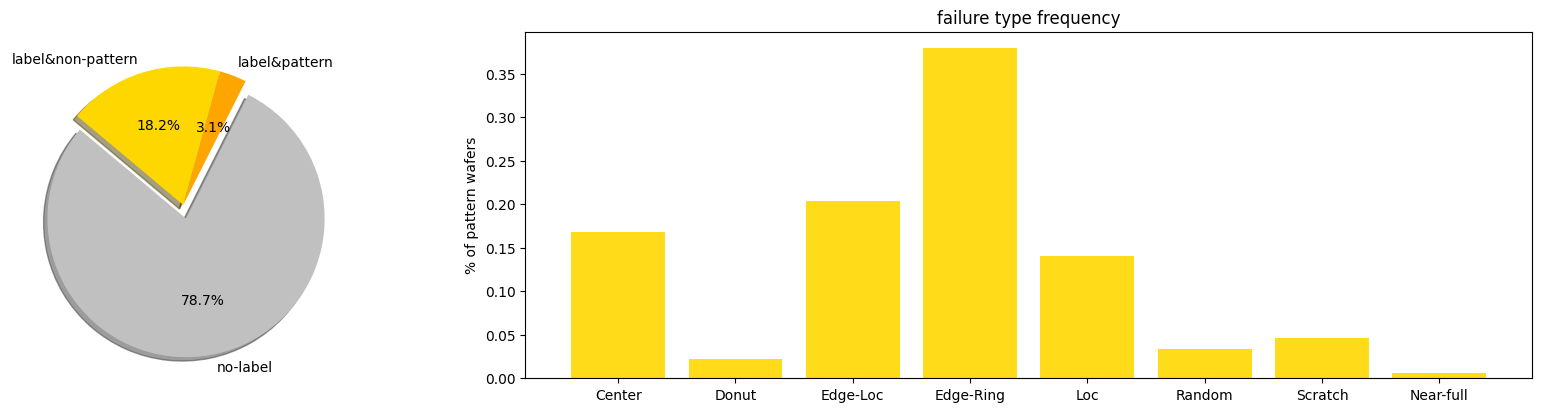

In [23]:
from matplotlib import gridspec
fig = plt.figure(figsize= (20, 4.5))
gs = gridspec.GridSpec(1,2,width_ratios=[1, 2.5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers - df_withlabel.shape[0], 
           df_withpattern.shape[0], 
           df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

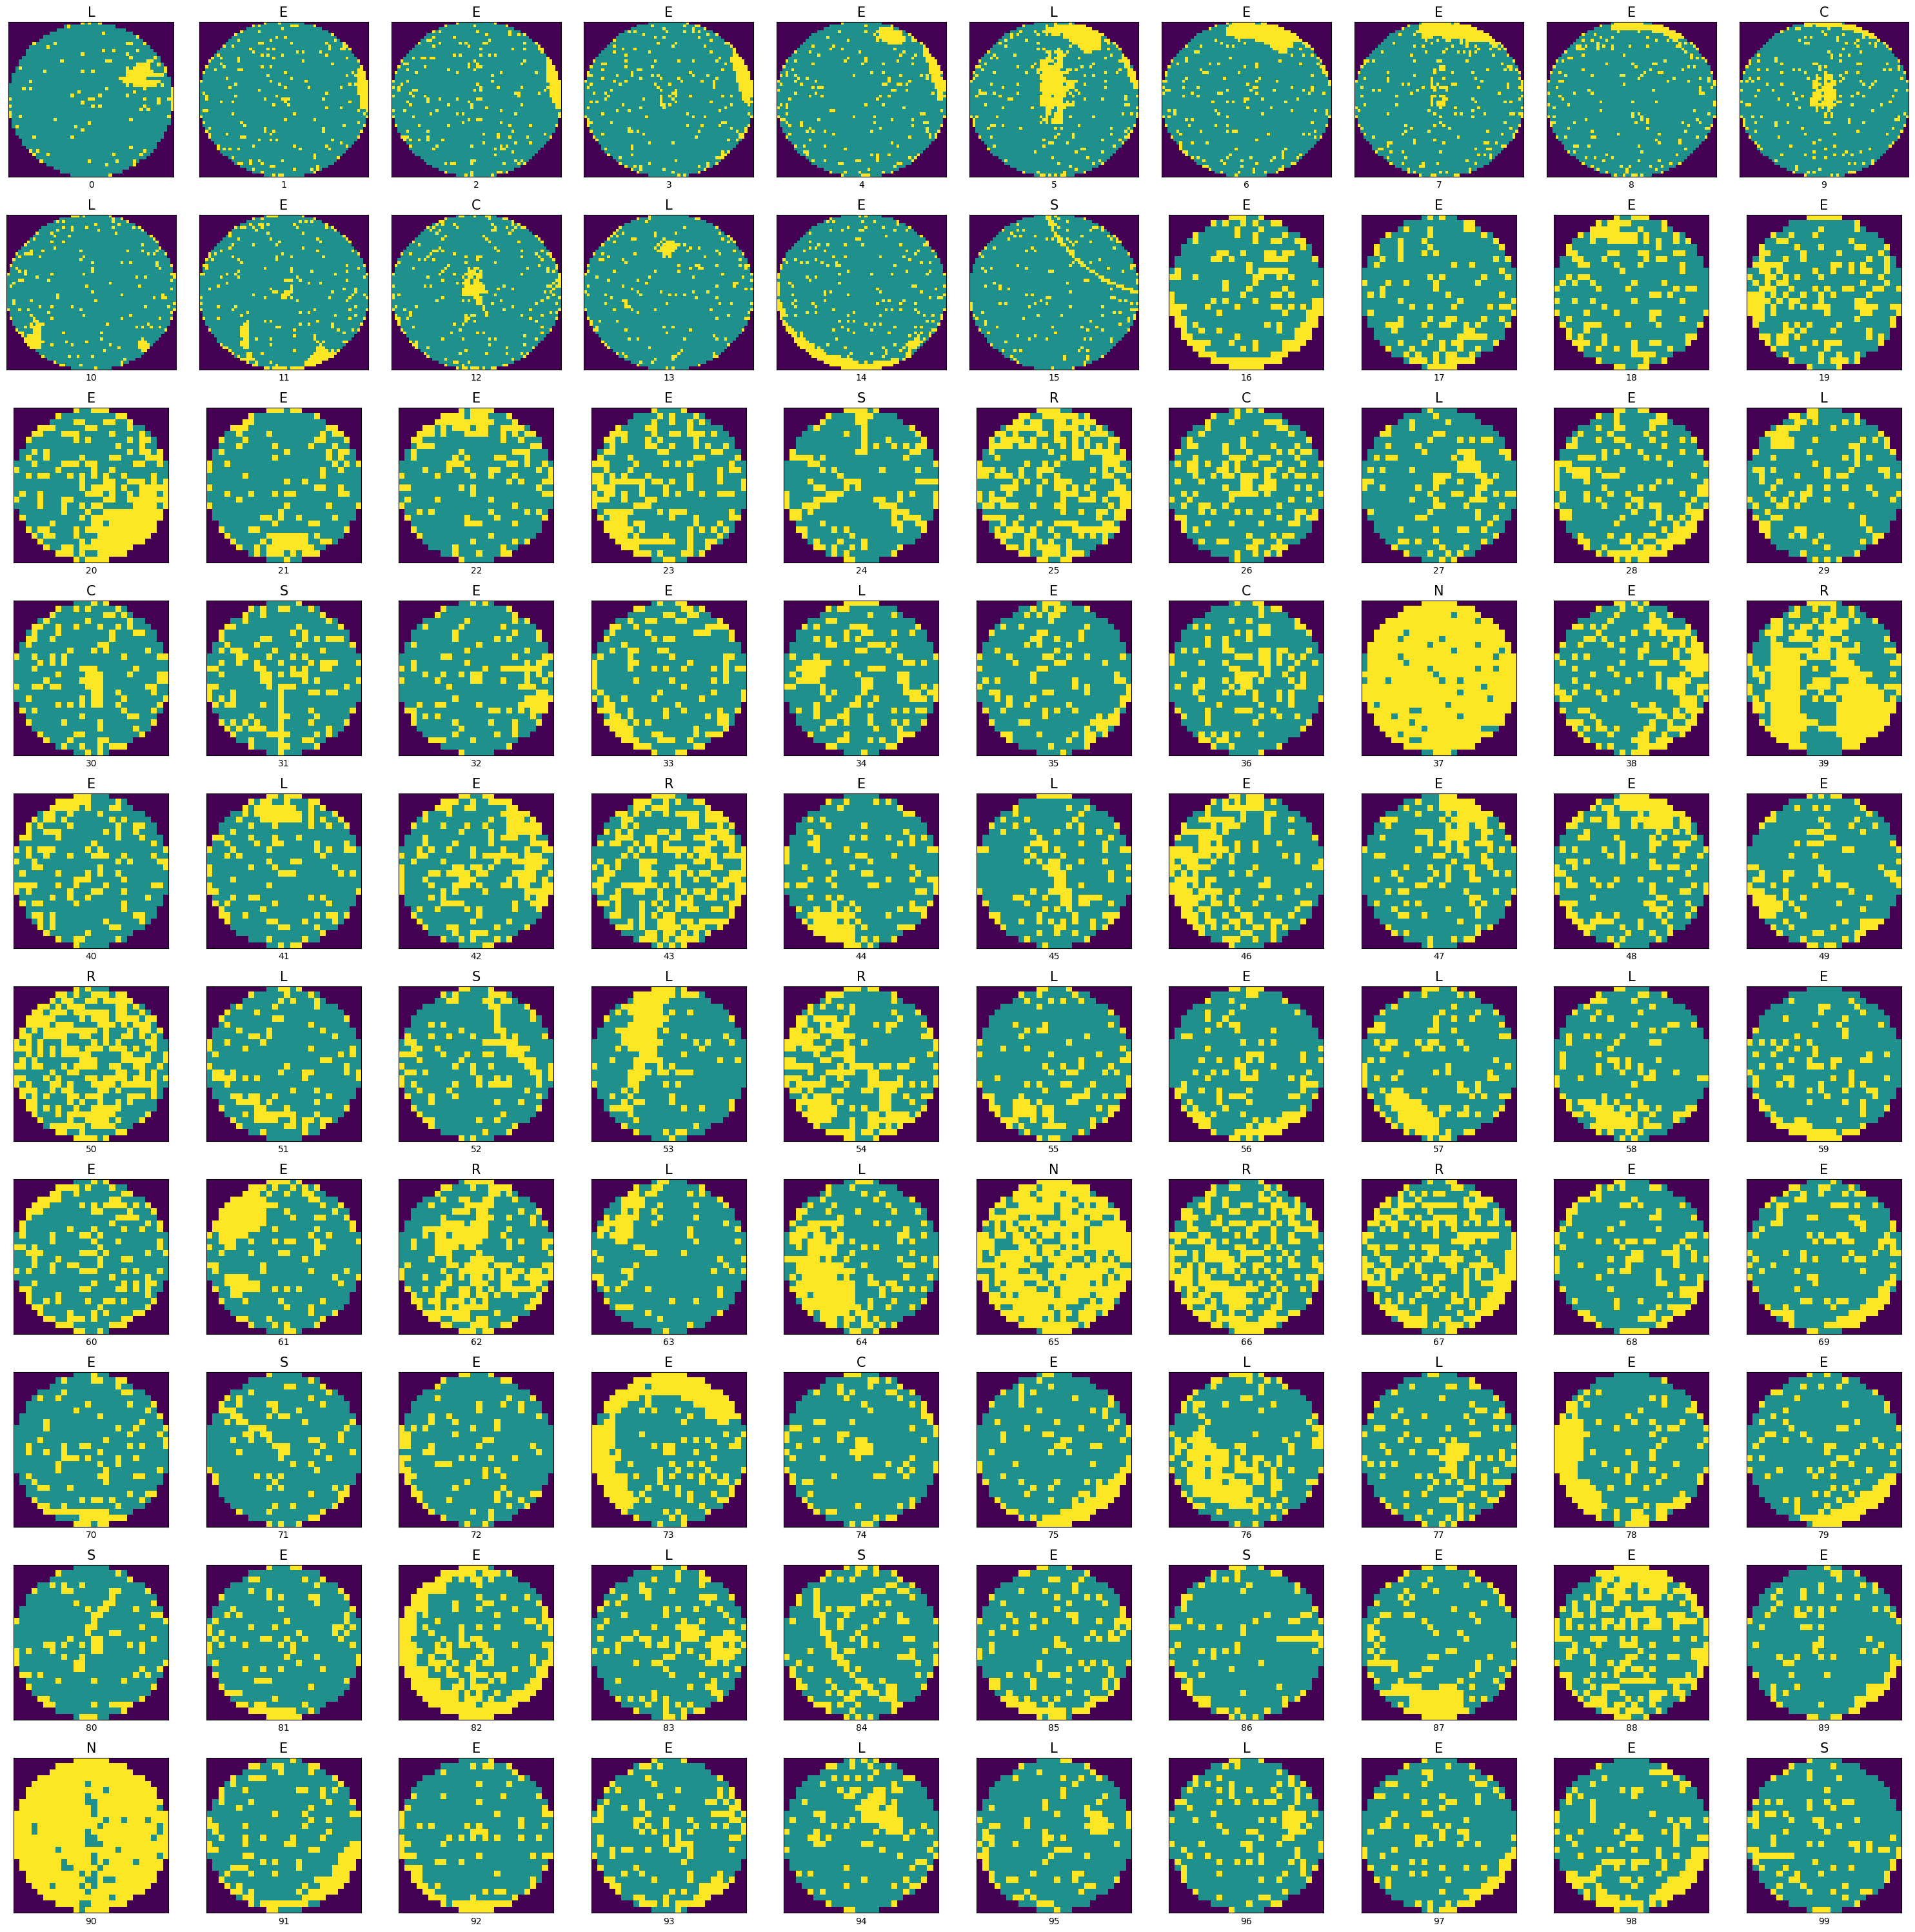

In [24]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(30, 30))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=15)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

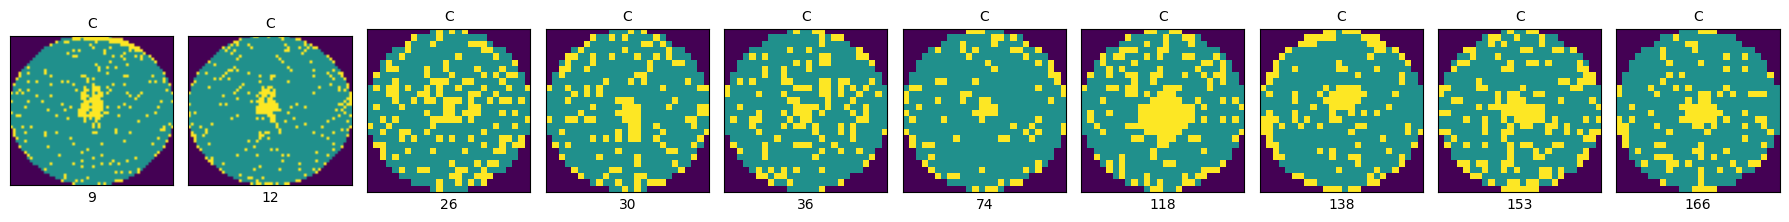

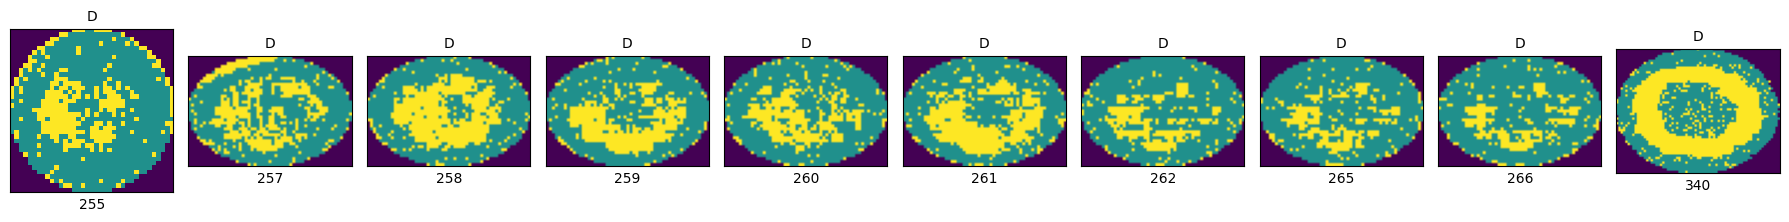

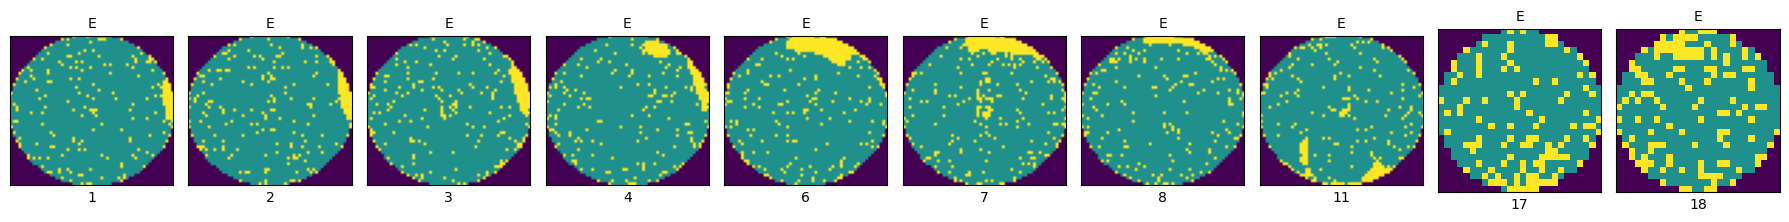

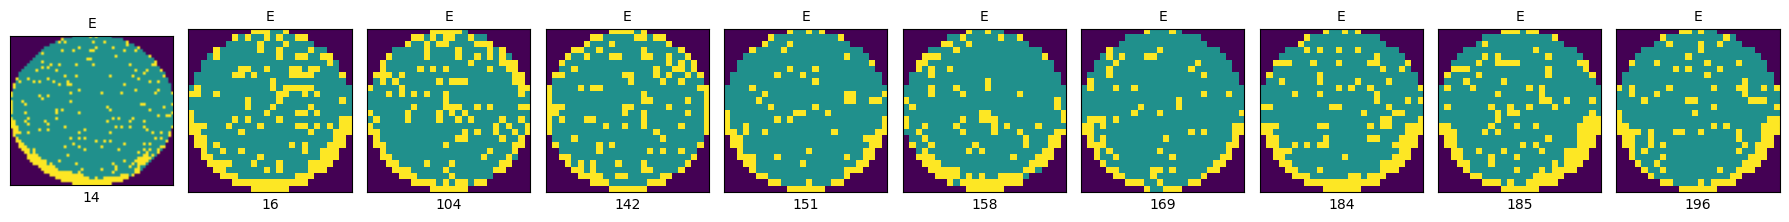

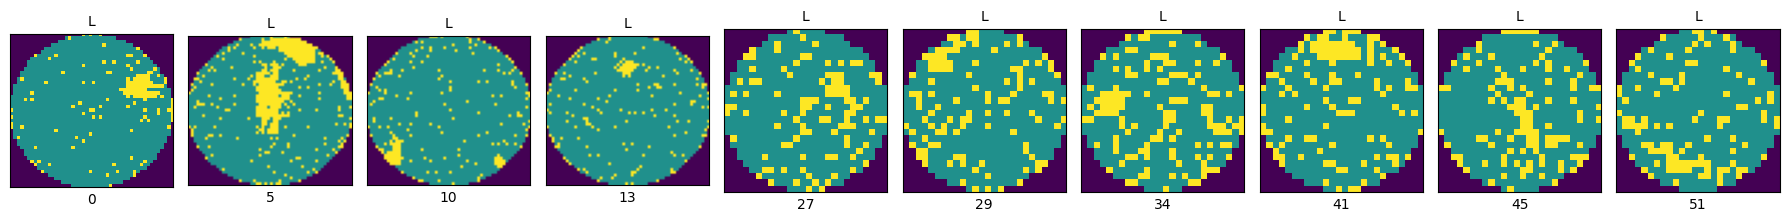

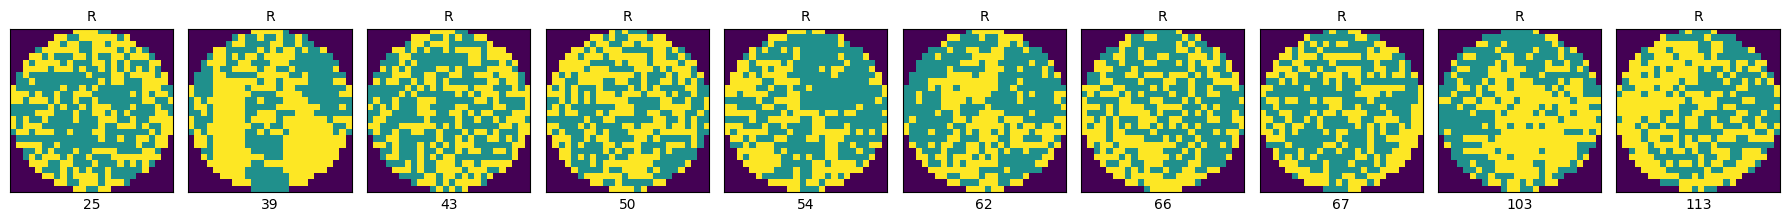

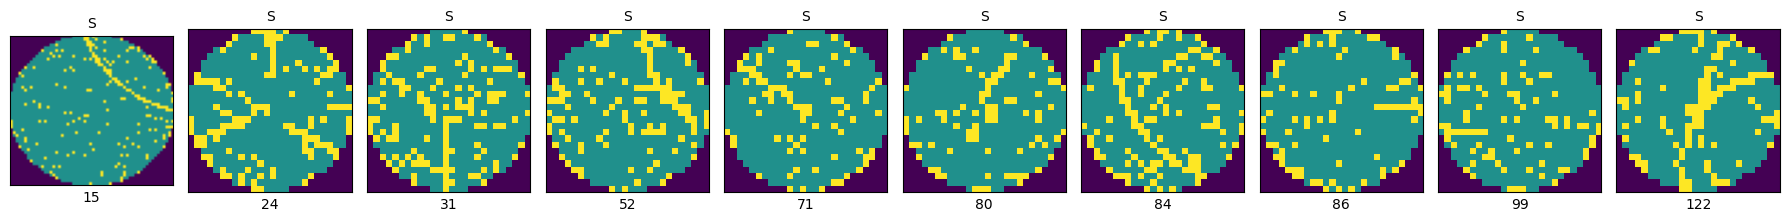

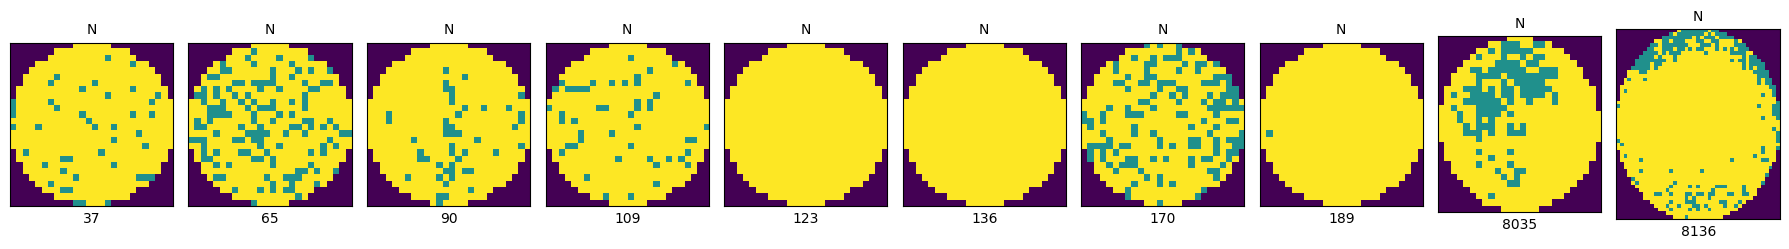

In [25]:
x=[0,1,2,3,4,5,6,7]
labels2=['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for i in x:
    fig, ax=plt.subplots(nrows=1, ncols=10, figsize=(18,12))
    ax=ax.ravel(order='C') 
    for j in [i]:
        img=df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for k in range(10):
            ax[k].imshow(img[img.index[k]])
            ax[k].set_title(df_withpattern.failureType[img.index[k]][0][0], fontsize=10)
            ax[k].set_xlabel(df_withpattern.index[img.index[k]], fontsize=10)
            ax[k].set_xticks([])
            ax[k].set_yticks([])
    plt.tight_layout()
    plt.show()

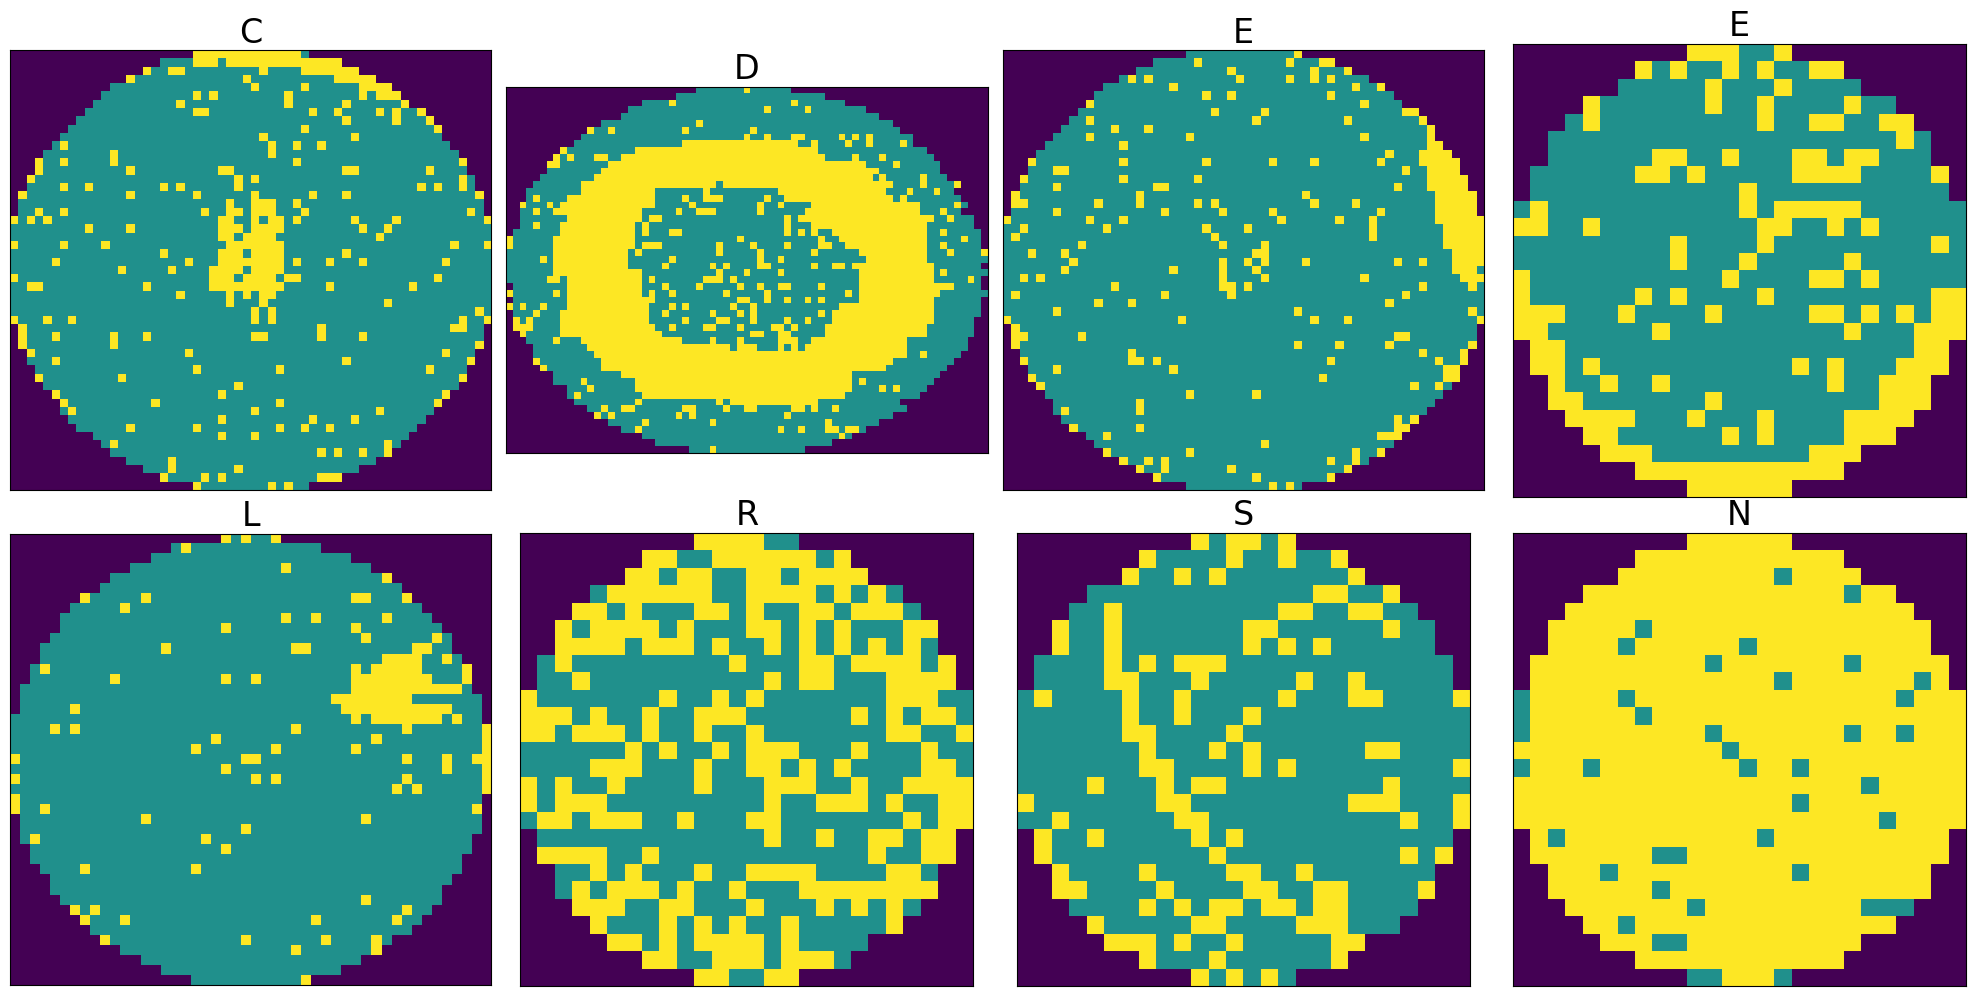

In [26]:
x=[9, 340, 3, 16, 0, 25, 84, 37]
labels2=['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(20,10))
ax=ax.ravel(order='C')
for i in range(8):
    img=df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0], fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

## Density-based Features Part

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


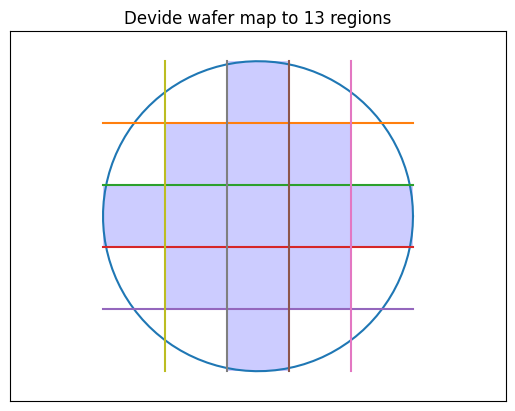

In [27]:
an=np.linspace(0, 2*np.pi, 100)                   
plt.plot(2.5*np.cos(an), 2.5*np.sin(an))          
plt.axis('equal')
plt.axis([-4,4,-4,4])                           


plt.plot([-2.5, 2.5], [1.5, 1.5])
plt.plot([-2.5, 2.5], [0.5, 0.5 ])
plt.plot([-2.5, 2.5], [-0.5, -0.5 ])
plt.plot([-2.5, 2.5], [-1.5,-1.5 ])
 
plt.plot([0.5, 0.5], [-2.5, 2.5])
plt.plot([1.5, 1.5], [-2.5, 2.5])
plt.plot([-0.5, -0.5], [-2.5, 2.5])
plt.plot([-1.5, -1.5], [-2.5, 2.5])


for i in range(-1, 2): 
    for j in range(-1, 2):  
        x = [i - 0.5, i + 0.5, i + 0.5, i - 0.5]
        y = [j - 0.5, j - 0.5, j + 0.5, j + 0.5]
        plt.fill(x, y, 'blue', alpha=0.2)

x = [-0.5, 0.5, 0.5, -0.5]
y = [1.5, 1.5, 2.5, 2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
x = [-0.5, 0.5, 0.5, -0.5]
y = [-1.5, -1.5, -2.5, -2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
y = [-0.5, 0.5, 0.5, -0.5]
x = [-1.5, -1.5, -2.5, -2.5]
plt.fill(x, y, 'blue', alpha=0.2) 
y = [-0.5, 0.5, 0.5, -0.5]
x = [1.5, 1.5, 2.5, 2.5]
plt.fill(x, y, 'blue', alpha=0.2) 


plt.title("Devide wafer map to 13 regions")
plt.xticks([]) 
plt.yticks([])
plt.show()

In [28]:
def cal_den(x):
    return 100*(np.sum(x==2)/np.size(x))  

def find_regions(x):
    rows=np.size(x,axis=0)
    cols=np.size(x,axis=1)
    ind1=np.arange(0,rows,rows//5)
    ind2=np.arange(0,cols,cols//5)

    reg1=x[ind1[0]:ind1[1],:]
    reg3=x[ind1[4]:,:]
    reg4=x[:,ind2[0]:ind2[1]]
    reg2=x[:,ind2[4]:]

    reg5=x[ind1[1]:ind1[2],ind2[1]:ind2[2]]
    reg6=x[ind1[1]:ind1[2],ind2[2]:ind2[3]]
    reg7=x[ind1[1]:ind1[2],ind2[3]:ind2[4]]
    reg8=x[ind1[2]:ind1[3],ind2[1]:ind2[2]]
    reg9=x[ind1[2]:ind1[3],ind2[2]:ind2[3]]
    reg10=x[ind1[2]:ind1[3],ind2[3]:ind2[4]]
    reg11=x[ind1[3]:ind1[4],ind2[1]:ind2[2]]
    reg12=x[ind1[3]:ind1[4],ind2[2]:ind2[3]]
    reg13=x[ind1[3]:ind1[4],ind2[3]:ind2[4]]

    fea_reg_den = []
    fea_reg_den = [cal_den(reg1),cal_den(reg2),cal_den(reg3),
                   cal_den(reg4),cal_den(reg5),cal_den(reg6),
                   cal_den(reg7),cal_den(reg8),cal_den(reg9),
                   cal_den(reg10),cal_den(reg11),cal_den(reg12),
                   cal_den(reg13)]
    
    return fea_reg_den

df_withpattern['fea_reg']=df_withpattern.waferMap.apply(find_regions)

df_withpattern.sample(10)

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum,fea_reg
3865,144851,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4020.0,lot9333,Training,Edge-Ring,"(72, 72)",3,0,"[11.805555555555555, 10.243055555555555, 10.85..."
12523,377216,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2126.0,lot22478,Training,Edge-Ring,"(53, 52)",3,0,"[9.230769230769232, 9.433962264150944, 9.17159..."
20837,731192,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",741.0,lot44283,Test,Loc,"(33, 29)",4,1,"[16.091954022988507, 6.397306397306397, 11.494..."
23546,770689,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1376.0,lot45882,Test,Edge-Loc,"(44, 41)",2,1,"[8.231707317073171, 13.88888888888889, 7.11382..."
2498,69624,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",846.0,lot5219,Training,Edge-Loc,"(33, 33)",2,0,"[13.636363636363635, 19.19191919191919, 10.774..."
3704,141335,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3927.0,lot9152,Training,Edge-Ring,"(69, 73)",3,0,"[8.956796628029505, 7.672634271099745, 8.62207..."
12102,360387,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2126.0,lot21581,Training,Edge-Ring,"(53, 52)",3,0,"[10.961538461538462, 10.69182389937107, 12.278..."
24941,806502,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1060.0,lot47339,Test,Loc,"(41, 33)",4,1,"[10.984848484848484, 7.588075880758807, 9.0909..."
15631,589508,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",515.0,lot36781,Training,Center,"(25, 27)",0,0,"[13.333333333333334, 18.857142857142858, 16.29..."
23431,769174,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1376.0,lot45821,Test,Scratch,"(44, 41)",6,1,"[6.402439024390244, 3.787878787878788, 9.34959..."


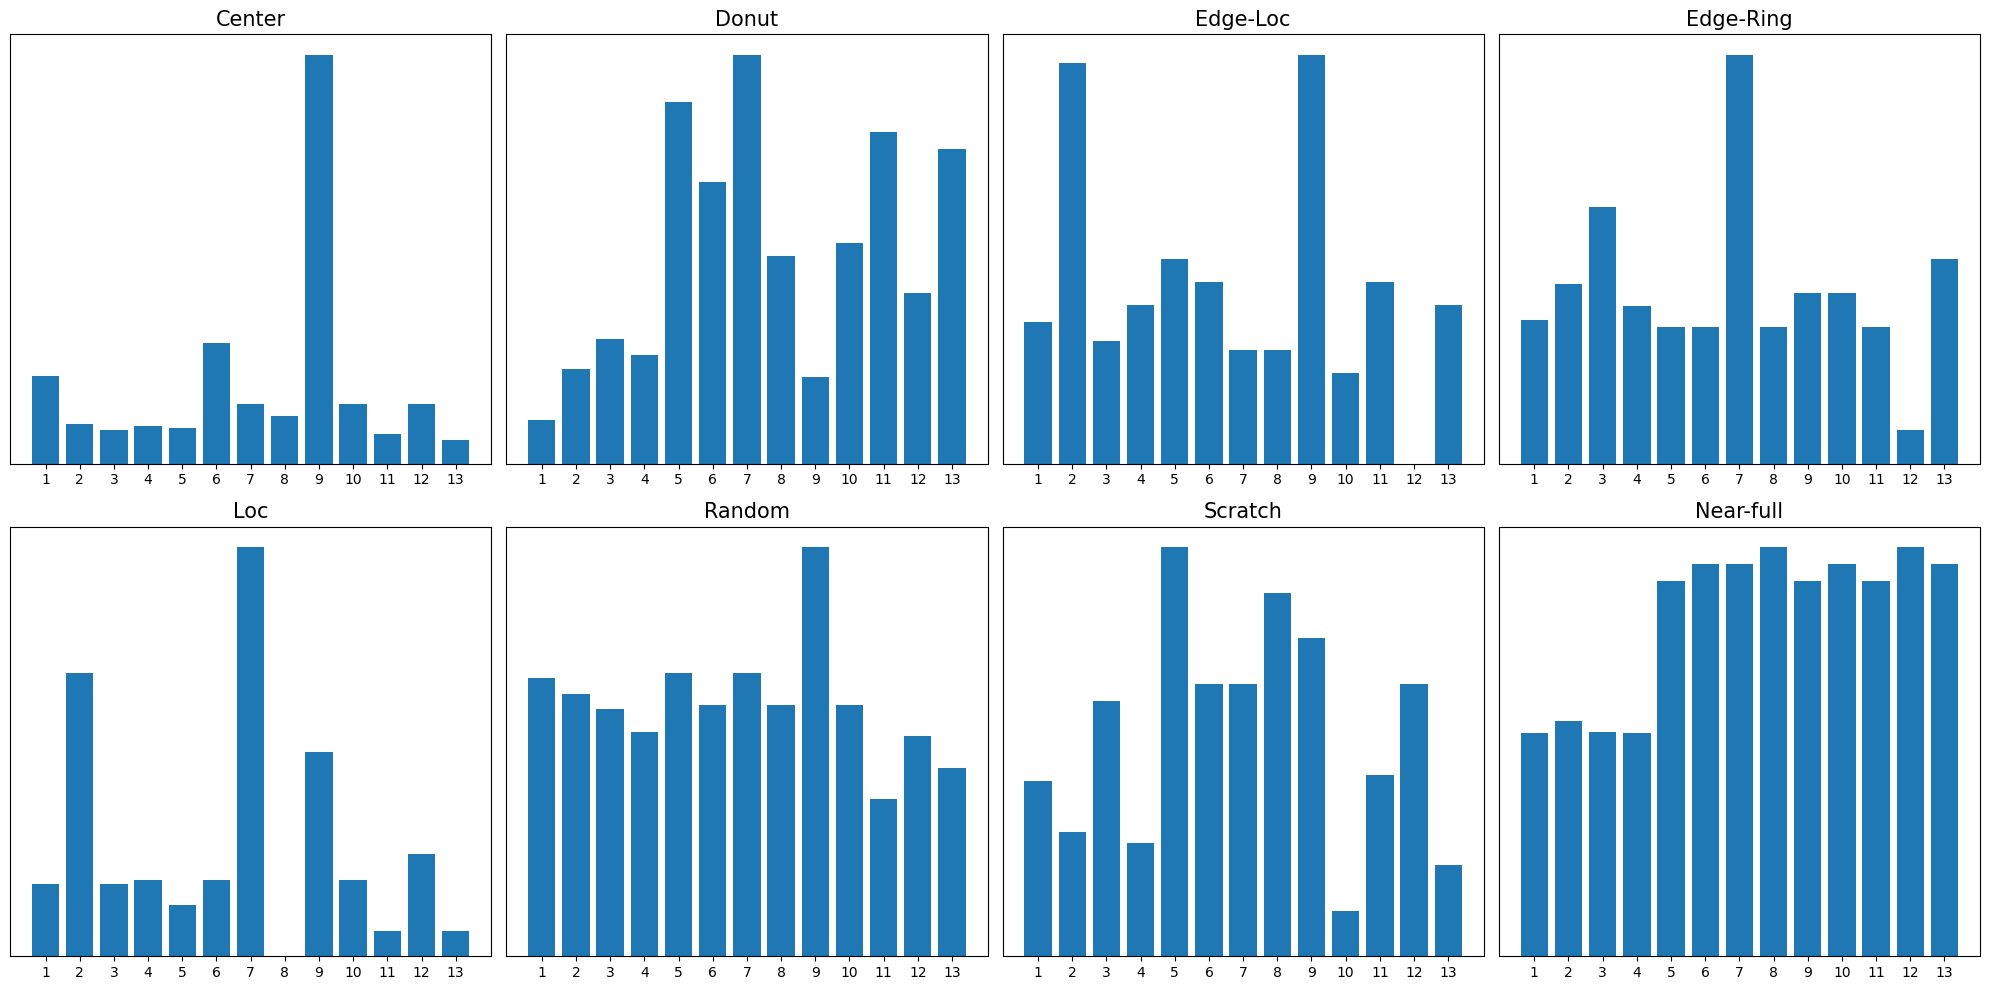

In [29]:
x = [9, 340, 3, 16, 0, 25, 84, 37]      
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.ravel()

for i, idx in enumerate(x):
    axes[i].bar(np.arange(1, 14), df_withpattern.fea_reg[idx])
    axes[i].set_title(labels2[i], fontsize=15)
    axes[i].set_xticks(np.arange(1, 14))        
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()


## Randon-based Features Part

In [30]:
from skimage.transform import radon
from scipy import interpolate

In [31]:
def change_val(img):
    img[img==1] = 0  
    return img

df_withpattern_copy = df_withpattern.copy()
df_withpattern_copy['new_waferMap'] =df_withpattern_copy.waferMap.apply(change_val)

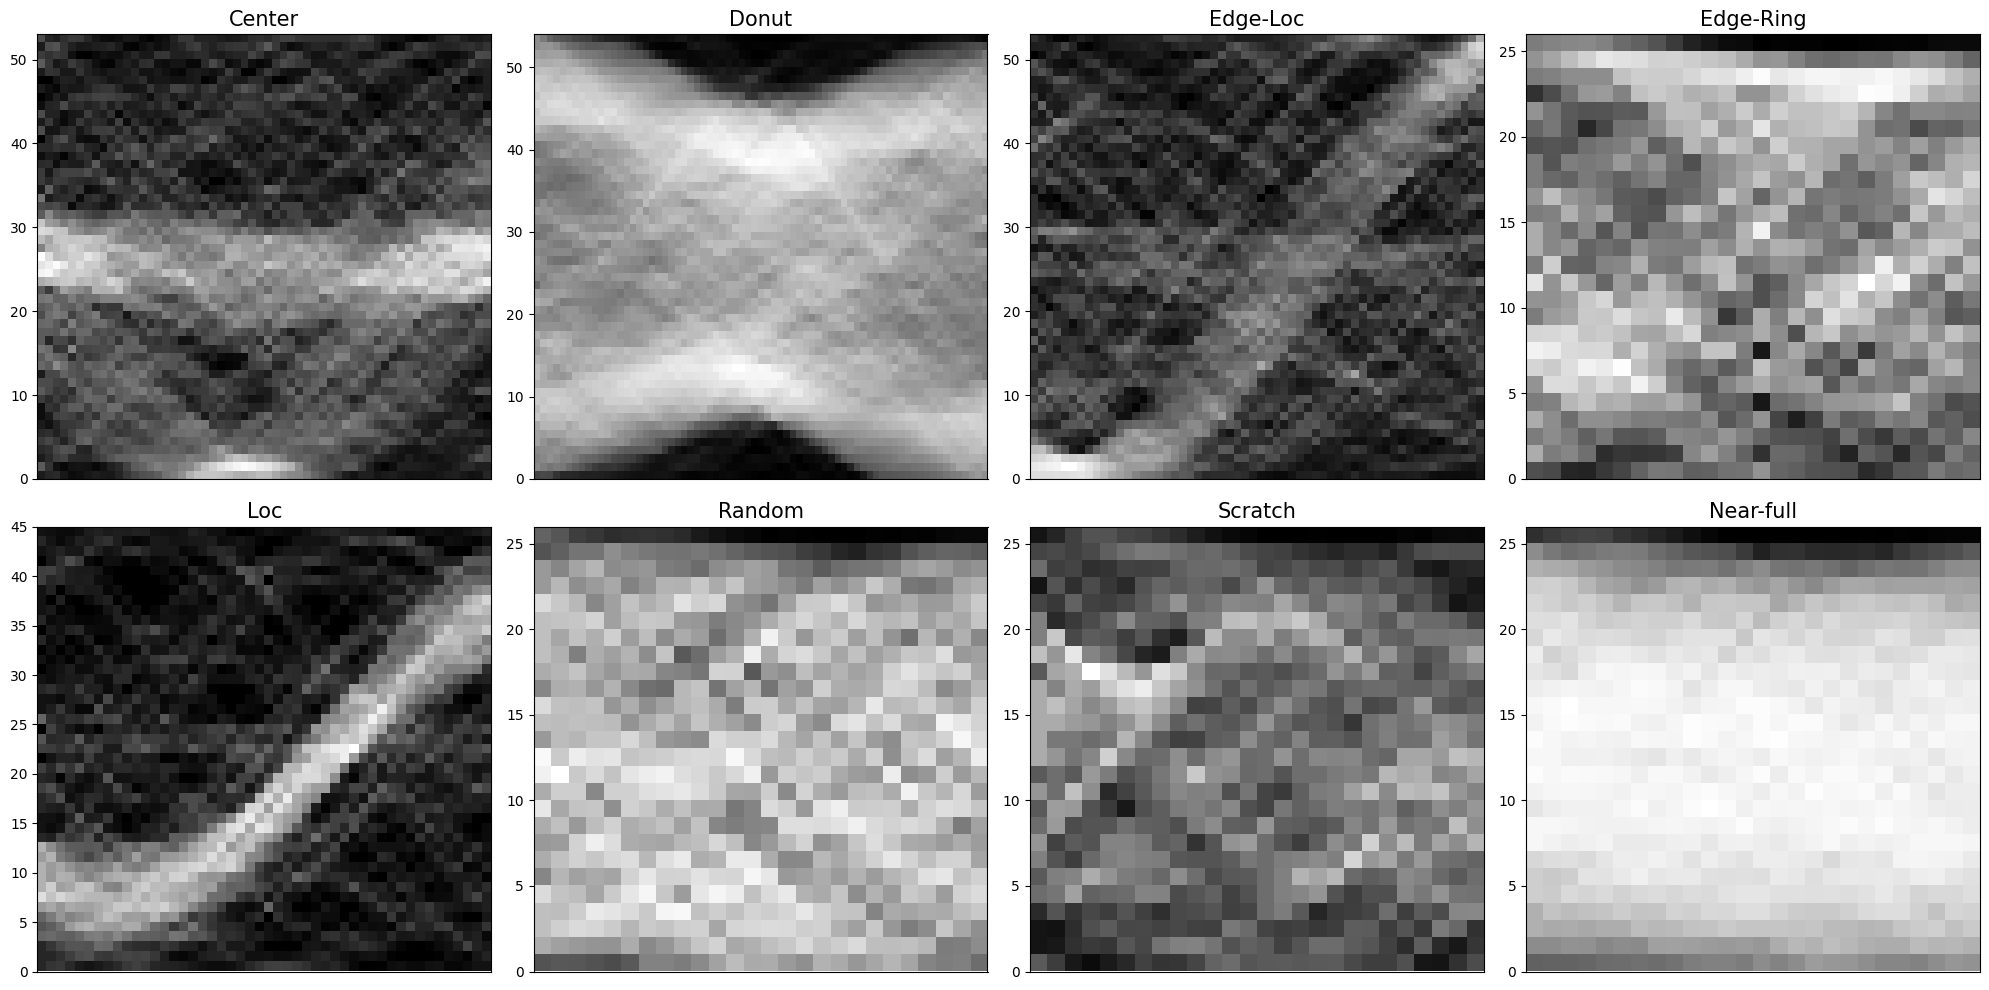

In [32]:
x = [9, 340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern_copy.waferMap[x[i]]
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)    

    ax[i].imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    ax[i].set_title(labels2[i],fontsize=15)
    ax[i].set_xticks([])
plt.tight_layout()

plt.show() 

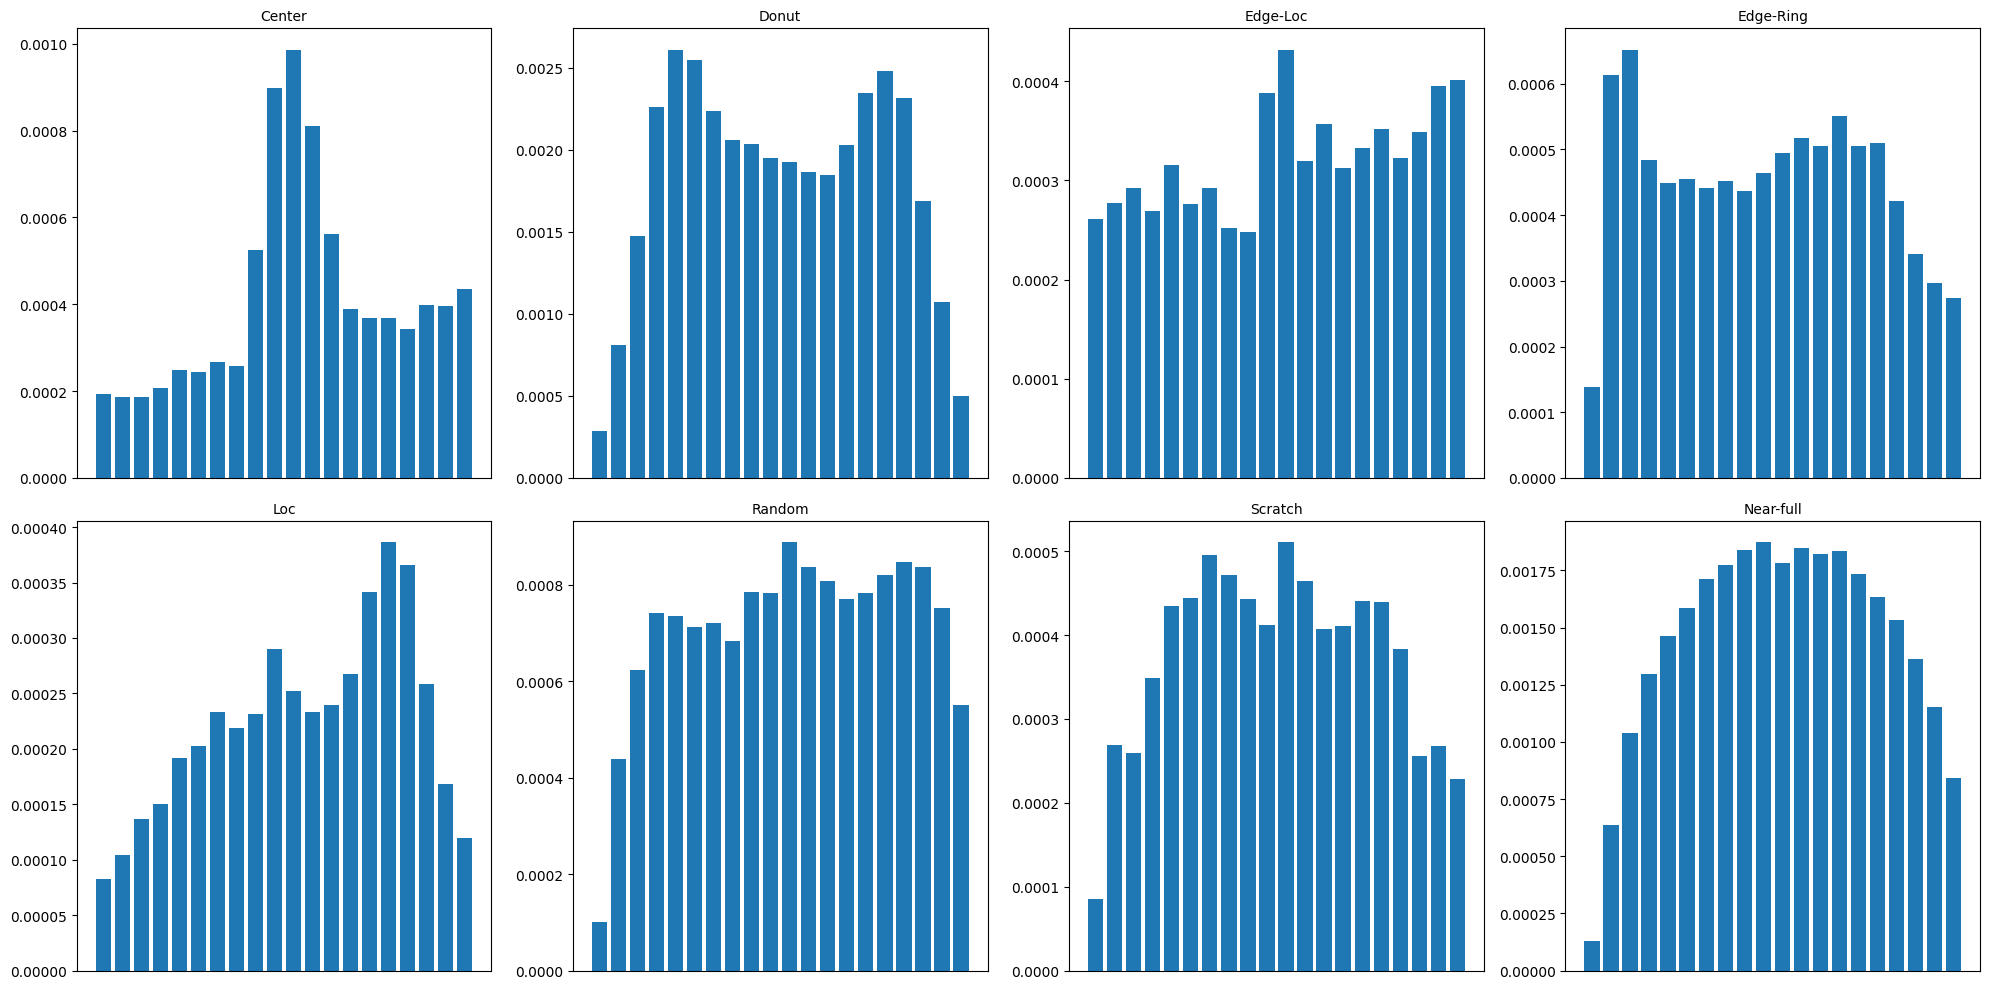

In [33]:
# Perform Radon transform, compute per-row mean of the sinogram,
# then use cubic interpolation to resample to 20 points
def cubic_inter_mean(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    row_means = np.mean(sinogram, axis=1)
    x_orig = np.linspace(1, row_means.size, row_means.size)
    cubic_func = interpolate.interp1d(x_orig, row_means, kind='cubic')
    x_new = np.linspace(1, row_means.size, 20)
    y_new = cubic_func(x_new) / 100
    return y_new

df_withpattern_copy['fea_cub_mean'] = df_withpattern_copy.waferMap.apply(cubic_inter_mean)

x = [9, 340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,20,20),df_withpattern_copy.fea_cub_mean[x[i]])
    ax[i].set_title(labels2[i],fontsize=10)
    ax[i].set_xticks([])

plt.tight_layout()
plt.show() 

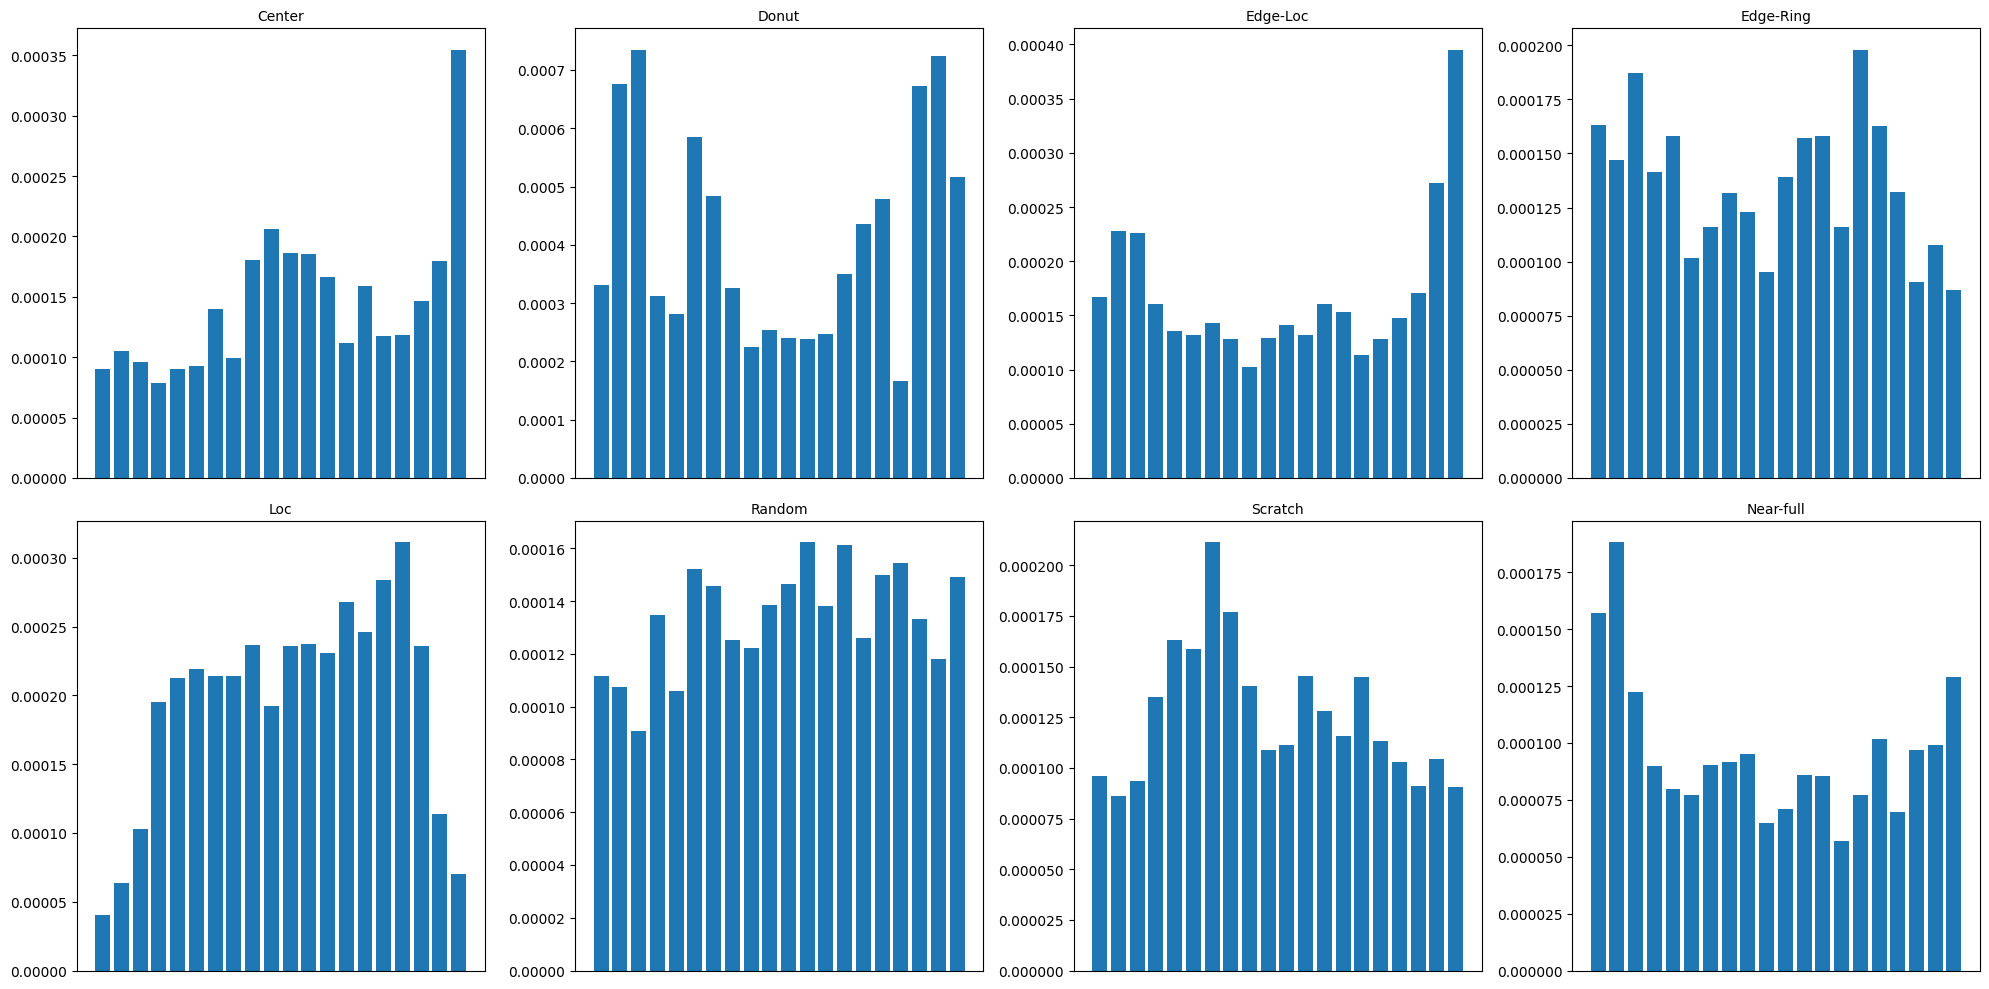

In [34]:
# Perform Radon transform, compute per-row standard deviation of the sinogram,
# then use cubic interpolation to resample to 20 points
def cubic_inter_std(img):
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta)
    row_stds = np.std(sinogram, axis=1)
    x_orig = np.linspace(1, row_stds.size, row_stds.size)
    cubic_func = interpolate.interp1d(x_orig, row_stds, kind='cubic')
    x_new = np.linspace(1, row_stds.size, 20)
    y_new = cubic_func(x_new) / 100
    return y_new

df_withpattern_copy['fea_cub_std'] = df_withpattern_copy.waferMap.apply(cubic_inter_std)

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,20,20),df_withpattern_copy.fea_cub_std[x[i]])
    ax[i].set_title(labels2[i],fontsize=10)
    ax[i].set_xticks([])

plt.tight_layout()
plt.show() 

## Geometry-based Features Part

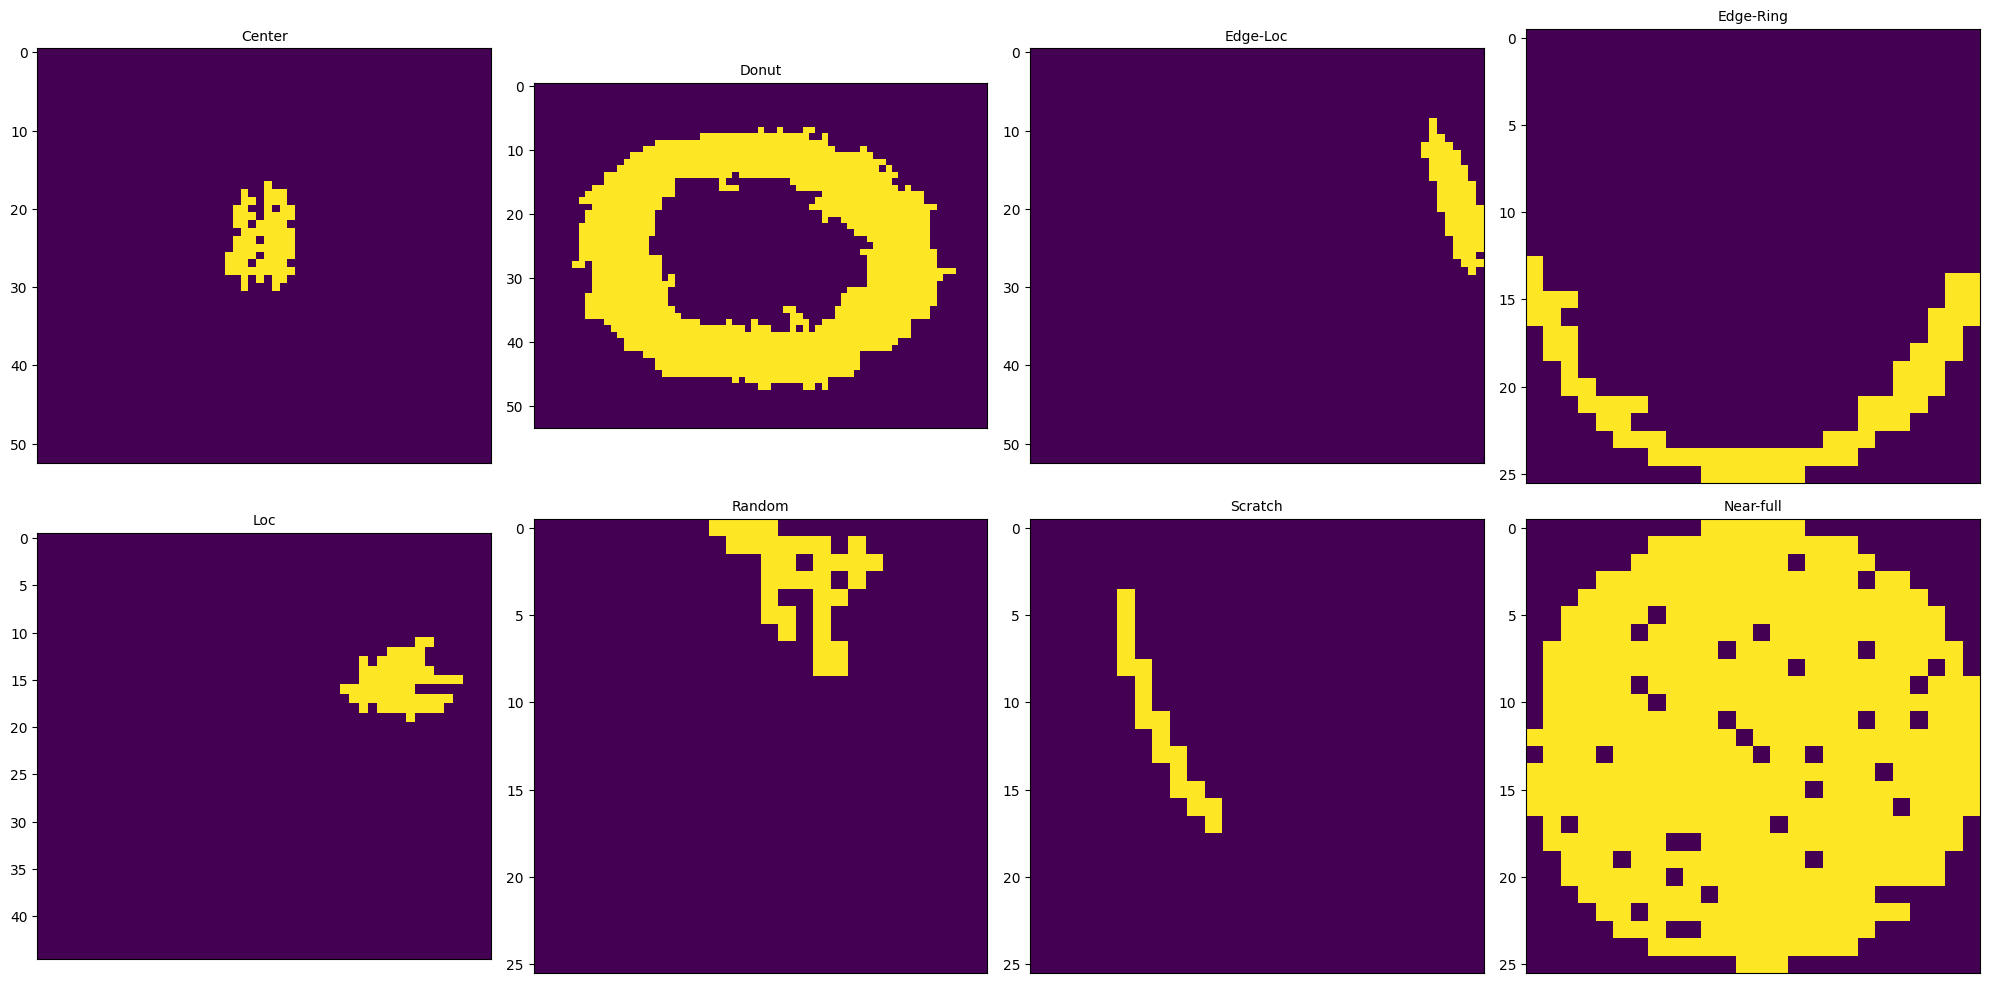

In [38]:
from skimage import measure
from scipy import stats

x = [9, 340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern_copy.waferMap[x[i]]
    zero_img = np.zeros(img.shape)                                                 
    img_labels = measure.label(img, connectivity=1, background=0)                  

    img_labels = img_labels-1
    
    if img_labels.max()==0:     
        no_region = 0
    else:
        info_region = stats.mode(img_labels[img_labels>-1], axis = None)        
        no_region = info_region[0]                                             

    zero_img[np.where(img_labels==no_region)] = 2   
    ax[i].imshow(zero_img)
    ax[i].set_title(labels2[i],fontsize=10)
    ax[i].set_xticks([])
plt.tight_layout()
plt.show() 

In [ ]:
# Measure how far a particular point is from the center in the image
def cal_dist(img,x,y):
    dim0=np.size(img,axis=0)    
    dim1=np.size(img,axis=1)
    dist = np.sqrt((x-dim0/2)**2+(y-dim1/2)**2)
    return dist  

# Function that extracts specific geomertical features from binary images
# Analyze the area connected of the image, 
# Calculates the area/perimeter/solidity...
def fea_geom(img):
    norm_area=img.shape[0]*img.shape[1]                                     
    norm_perimeter=np.sqrt((img.shape[0])**2+(img.shape[1])**2)             

    img_labels = measure.label(img, connectivity=1, background=0)          

    
    if img_labels.max()==0:
        img_labels[img_labels==0]=1
        no_region = 0
    else:
        info_region = stats.mode(img_labels[img_labels>0], axis = None)
        no_region = info_region[0]-1       

    
    prop = measure.regionprops(img_labels)              
    prop_area = prop[no_region].area/norm_area                     
    prop_perimeter = prop[no_region].perimeter/norm_perimeter       

    prop_cent = prop[no_region].local_centroid                     
    prop_cent = cal_dist(img,prop_cent[0],prop_cent[1])             

    prop_majaxis = prop[no_region].major_axis_length/norm_perimeter 
    prop_minaxis = prop[no_region].minor_axis_length/norm_perimeter 
    prop_ecc = prop[no_region].eccentricity                         
    prop_solidity = prop[no_region].solidity                        

    return prop_area,prop_perimeter,prop_majaxis,prop_minaxis,prop_ecc,prop_solidity

In [42]:
df_withpattern_copy['fea_geom'] =df_withpattern_copy.waferMap.apply(fea_geom)

In [43]:
df_withpattern_copy.fea_geom[340]

(0.30881585811163276,
 3.4633305623147477,
 0.7464951525564261,
 0.5214489845402435,
 0.7155811292862498,
 0.6103092783505155)

In [44]:
df_withpattern_copy.head(10)

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum,fea_reg,new_waferMap,fea_cub_mean,fea_cub_std,fea_geom
0,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,Loc,"(45, 48)",4,0,"[3.4722222222222223, 13.703703703703704, 3.472...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8.215024391397317e-05, 0.00010463980628879118...","[4.0417074098845694e-05, 6.363021854617116e-05...","(0.027314814814814816, 0.5954493227790636, 0.1..."
1,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[6.0344827586206895, 11.05121293800539, 5.1724...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0002109536214678039, 0.00023458287259812304...","[0.00014887071778255933, 0.0001421232925195758...","(0.01626545217957059, 0.42137276857016587, 0.2..."
2,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[5.862068965517241, 11.320754716981133, 5.0397...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00017334314563558482, 0.0002366028591350646...","[0.00012072368578950261, 0.0001643966647525084...","(0.019193233571893297, 0.4595560383749584, 0.2..."
3,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[5.689655172413794, 16.037735849056602, 4.9071...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00026157443437621207, 0.0002777706239213663...","[0.0001666441319079073, 0.0002281864463553215,...","(0.025374105400130124, 0.49864384199138284, 0...."
4,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[11.551724137931034, 13.07277628032345, 5.0397...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0002512140845195993, 0.00027318127047125834...","[0.0001206891136499179, 0.00019005960944182504...","(0.019843851659076123, 0.5065518560958309, 0.2..."
5,40,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Loc,"(53, 58)",4,0,"[23.96551724137931, 10.242587601078167, 4.6419...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00020915594517310692, 0.0002206679996818512...","[0.00011975468607331843, 0.0001406699034060281...","(0.0631099544567339, 1.3221104091431168, 0.323..."
6,41,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[29.48275862068965, 7.547169811320755, 5.83554...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0002257616660704687, 0.00021133350067492507...","[0.00010533732825142781, 0.0001082802560894349...","(0.05139882888744307, 0.7927390445455735, 0.33..."
7,42,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[27.068965517241377, 9.164420485175203, 6.2334...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00021820634391154462, 0.0002689617227061187...","[8.673068961893898e-05, 0.00010173770476771465...","(0.04554326610279766, 0.8076505389428379, 0.36..."
8,43,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",2,0,"[17.93103448275862, 7.412398921832884, 5.17241...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00017235868866502874, 0.0002398405323941357...","[9.511534460959639e-05, 0.00010752865763104786...","(0.02309694209499024, 0.6667406825136332, 0.36..."
9,44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Center,"(53, 58)",0,0,"[13.275862068965516, 6.064690026954178, 5.1724...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.00019338917131841621, 0.0001876137373692150...","[9.046030873256608e-05, 0.00010518601418319, 9...","(0.026024723487312947, 0.5754626485067839, 0.1..."
